In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [67]:
from google.colab import files
uploaded = files.upload()

In [68]:
df = pd.read_csv('pima_indian_data.csv')
print(df.isna().sum())
df.head()

Number  of times pregnant     0
Plasma glucose                0
Diastolic blood pressure      0
Triceps skinfold thickness    0
serum insulin                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64


,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


After a brief review of the data we can see there is very little cleaning we need to to. All of the values are numberic an none are missing. The only resonable alteration we should do would be to scale the data as several features are on a scale of $10^{-1}$ while others are on a $10{^3}$ scale.

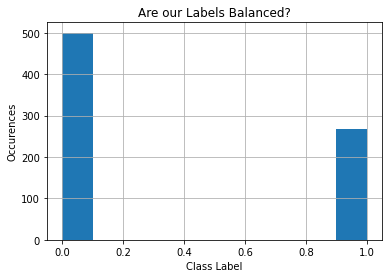

In [69]:
df['Class'].hist()
plt.xlabel('Class Label')
plt.ylabel('Occurences')
plt.title('Are our Labels Balanced?')
plt.show()

The class labels are relatively balanced so using accuracy as a metric should not be misleading.

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

X = df.iloc[:,0:8].values
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7291666666666666

In [74]:
from sklearn.model_selection import GridSearchCV

parameters = {
  'lr__C':[.1, 1, 10, 100, 1000],
  'lr__solver':['lbfgs', 'saga', 'sag']
  }

grid_pipe = GridSearchCV(pipe, parameters, scoring='accuracy', cv=10)
grid_pipe.fit(X_train, y_train)
grid_pipe.score(X_test, y_test)

0.7291666666666666

Based on our results the best model is the one that uses the default parameters.